In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopy
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.dropna(how='any', inplace=True)

In [7]:
df1 = df.drop(['url', 'address', 'phone', 'menu_item'], axis = 1)
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [8]:
df1 = df1.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

#### Converting the Price(object) to Price(string)

In [9]:
df1['cost'] = df1['cost'].astype(str)
df1['cost'] = df1['cost'].apply(lambda x:x.replace(',','.'))
df1['cost'] = df1['cost'].astype(float)

#### Converting the rate(object) to rate(string) by removing the slash symbol.

In [10]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df1 = df1.loc[df1.rate != 'NEW']
df1 = df1.loc[df1.rate != '-'].reset_index(drop = True)

In [12]:
df1['rate'] = df1['rate'].astype(str)
df1['rate'] = df1['rate'].apply(lambda x:x.replace('/5', ''))
df1['rate'] = df1['rate'].astype(float)

In [13]:
df1.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
df1.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
type            0
city            0
dtype: int64

In [15]:
df1.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

In [16]:
df1.cost.max() == df1.cuisines

0        False
1        False
2        False
3        False
4        False
         ...  
23041    False
23042    False
23043    False
23044    False
23045    False
Name: cuisines, Length: 23046, dtype: bool

In [17]:
print("The top 4 most costly irrespective to the number of reviews:\n")
popular = df1.sort_values(['cost'], ascending = False).head()['name'].unique()
i = 0
while i<len(popular):
    print(popular[i])
    i = i+1

The top 4 most costly irrespective to the number of reviews:

The Onyx - The HHI Select Bengaluru
Bathinda Dine
Caffe Pascucci
Ayda Persian Kitchen


Text(0.5, 0, 'Number of outlets')

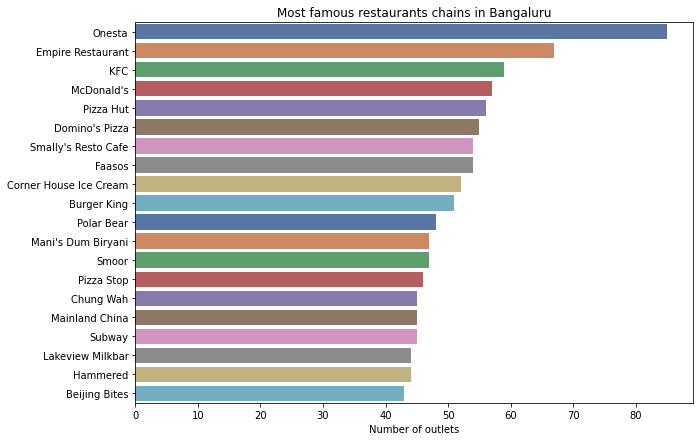

In [18]:
plt.figure(figsize=(10,7))
chains=df1['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

Text(0.5, 1.0, 'locality')

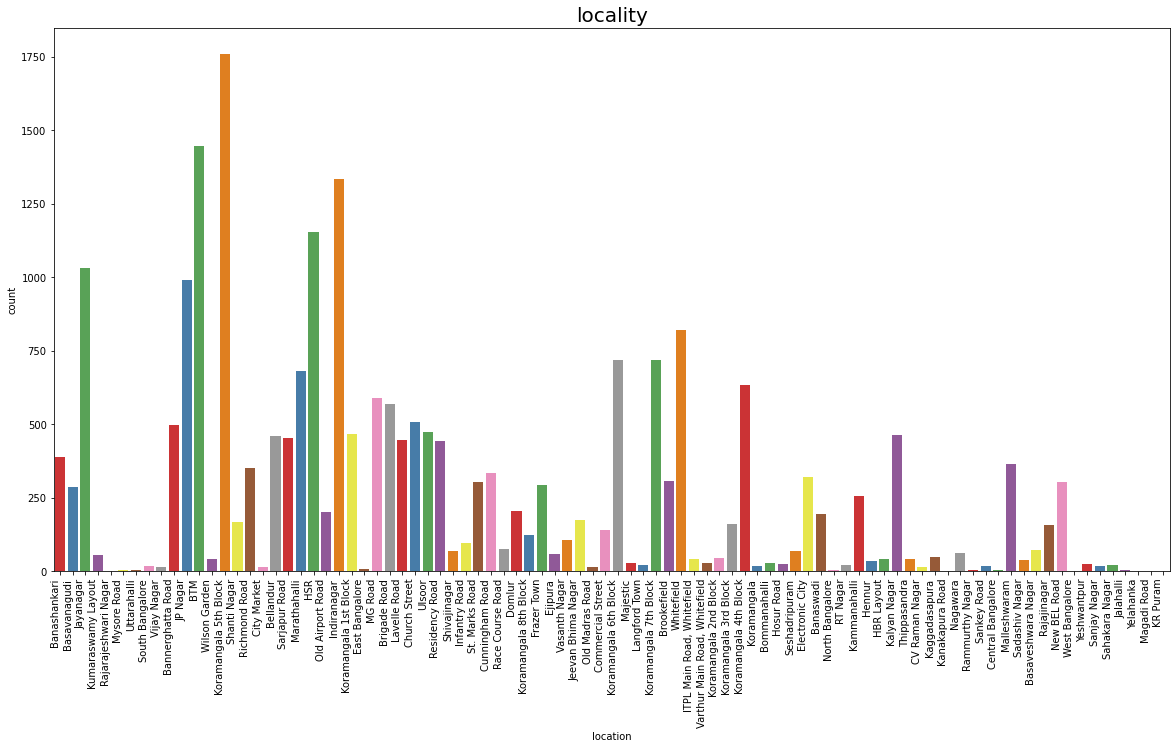

In [19]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="location",data=df1, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 20)

Text(0.5, 1.0, 'rest_type')

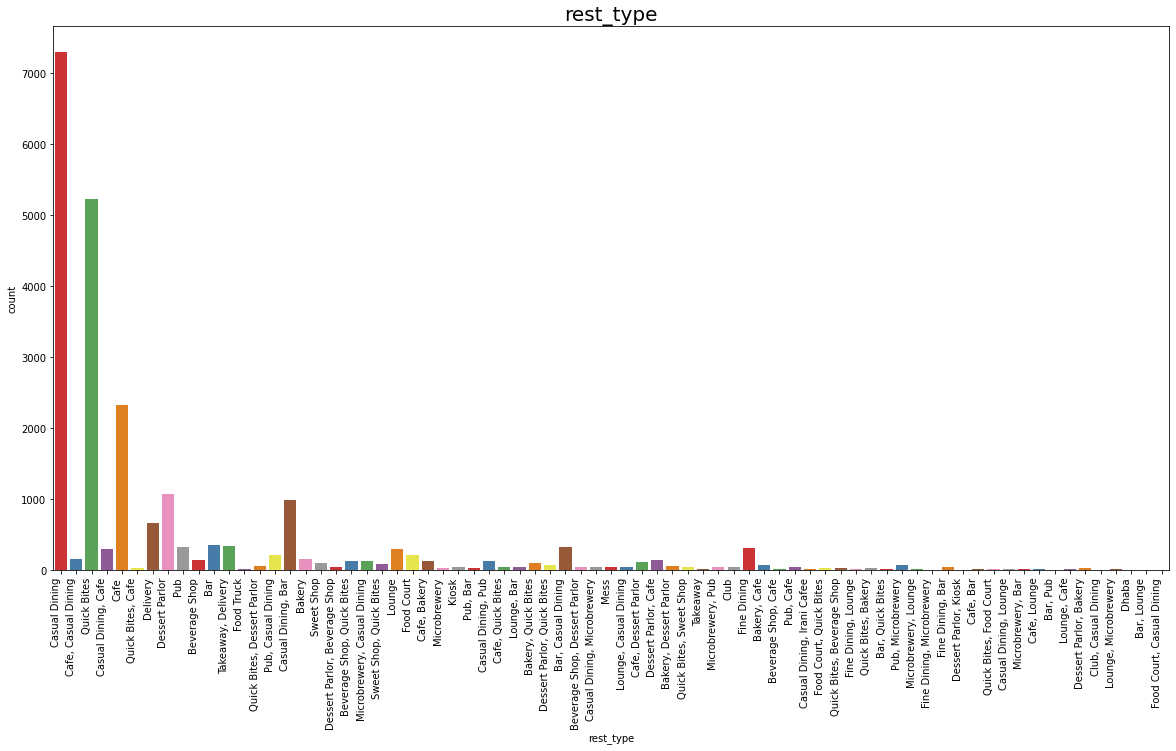

In [20]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="rest_type",data=df1, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('rest_type',size = 20)

Text(0.5, 0, 'count')

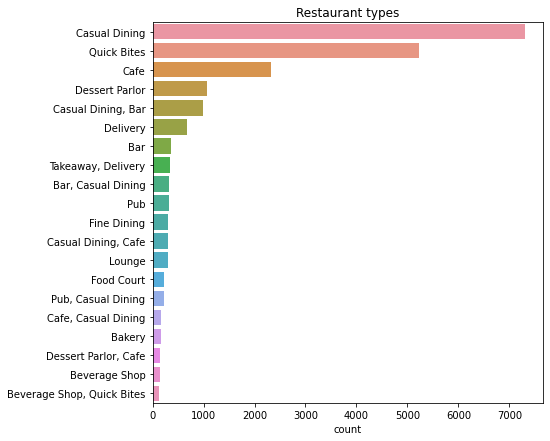

In [21]:
plt.figure(figsize=(7,7))
rest=df1['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

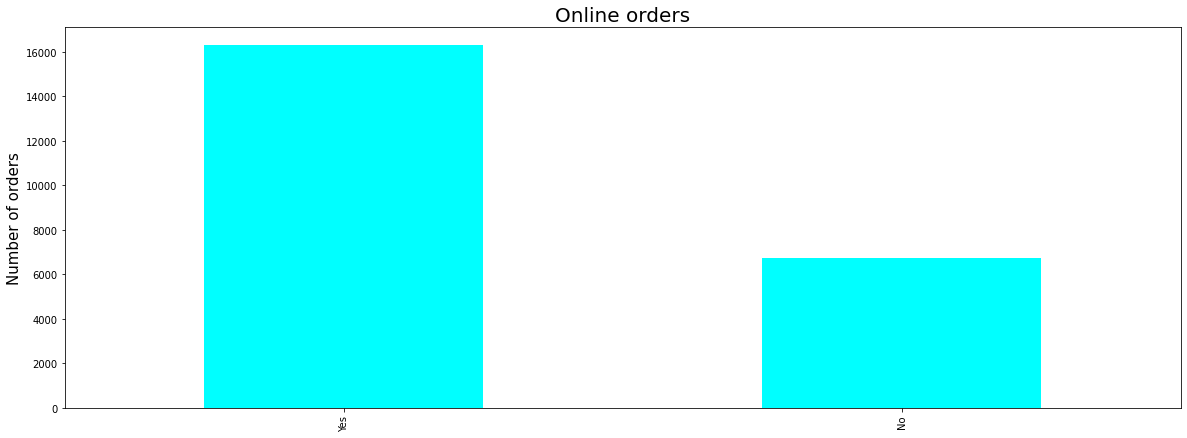

In [22]:
plt.figure(figsize=(20,7))
df1['online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

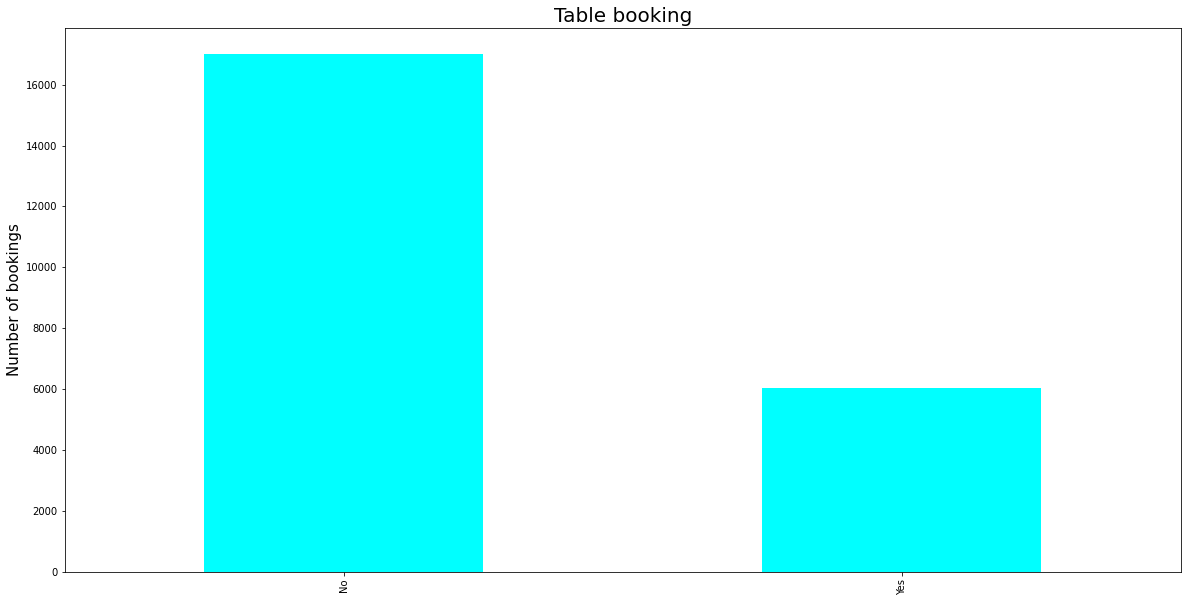

In [23]:
plt.rcParams['figure.figsize'] = (20, 10)

df1['book_table'].value_counts().plot.bar(color = 'cyan')
plt.title('Table booking', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()

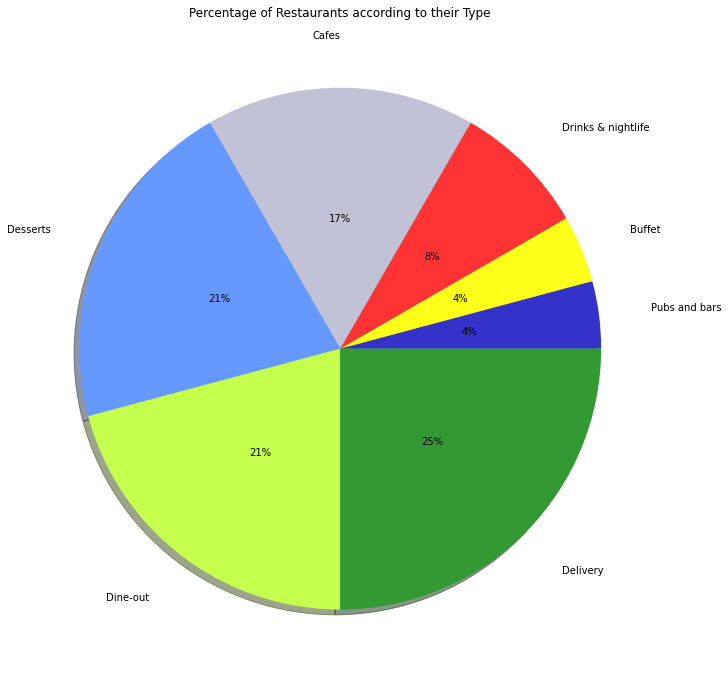

In [24]:
restaurantTypeCount=df1['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", )

fig.set_size_inches(12,12)
plt.show()

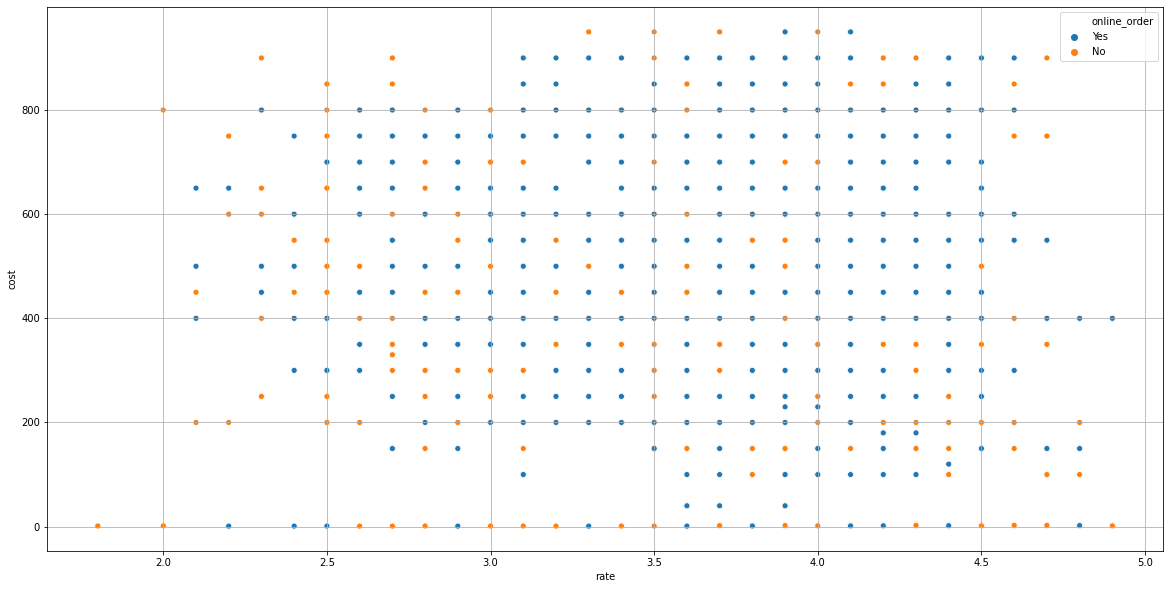

In [25]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'rate', y = 'cost', hue = 'online_order', data = df1)
plt.grid()
plt.show()

In [26]:
def return_budget(location, rest):
    budget = df1[(df1['cost'] <= 400) & (df1['location'] == location) & (df1['rate']>4) & (df1['rest_type'] == rest)]
    return(budget['name'].unique())

In [27]:
return_budget('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', "Muthashy's", 'Swad Punjab Da', "Domino's Pizza",
       'Roti Wala'], dtype=object)

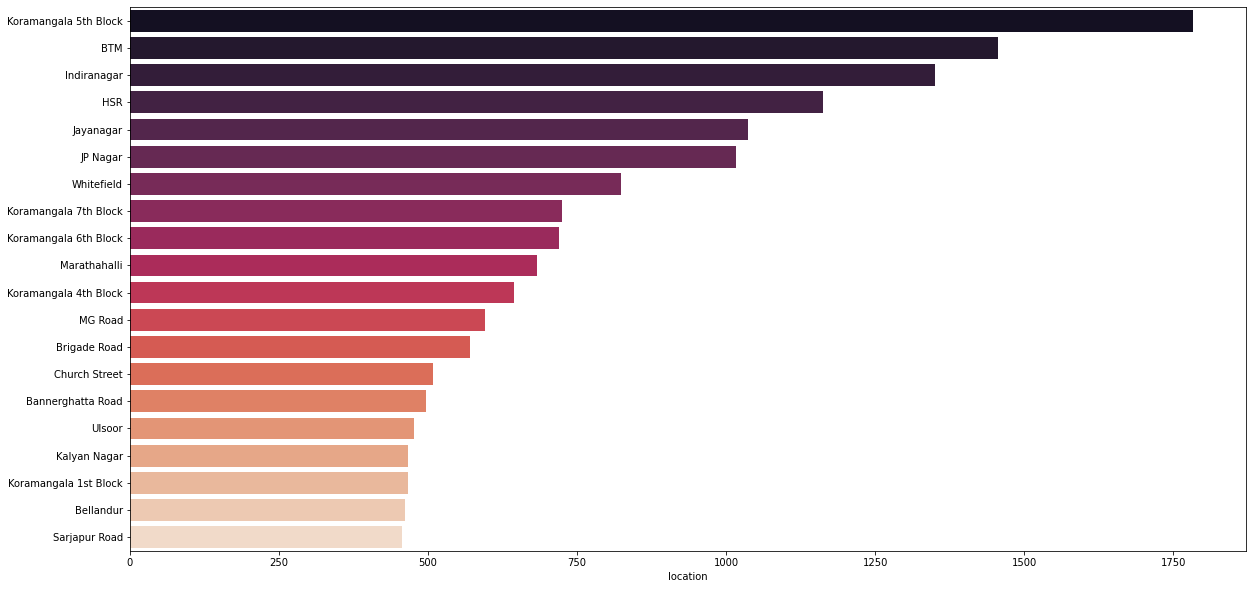

In [28]:
plt.figure(figsize = (20,10))
Restaurent_Locations = df['location'].value_counts()[:20]
sns.barplot(Restaurent_Locations, Restaurent_Locations.index, palette = 'rocket')

In [29]:
df2=df1[['name','cost','location','rest_type','cuisines']].groupby(['cost'], sort = True)
df2=df2.filter(lambda x: x.mean() <= 1500)
df2=df2.sort_values(by=['cost'])

df2_expensive=df1[['name','cost','location','rest_type','cuisines']].groupby(['cost'], sort = True)
df2_expensive=df2_expensive.filter(lambda x: x.mean() >= 3000)
df2_expensive=df2_expensive.sort_values(by=['cost'])

In [30]:
df2

,name,cost,location,rest_type,cuisines
17570,Village - The Soul of India,1.0,Malleshwaram,Casual Dining,"North Indian, South Indian"
1207,Cable Car,1.0,Jayanagar,Casual Dining,"North Indian, Italian"
1205,Bella,1.0,Jayanagar,Casual Dining,"Mangalorean, Seafood, South Indian"
1203,Subz,1.0,Jayanagar,Casual Dining,"North Indian, South Indian"
4191,Mimansa @ Foxtrot,1.0,Koramangala 3rd Block,Cafe,Cafe
...,...,...,...,...,...
7328,Caffe Pascucci,950.0,HSR,Cafe,"Cafe, Continental, Pizza, Italian, Beverages"
8209,Bathinda Dine,950.0,Indiranagar,Casual Dining,North Indian
9286,1947,950.0,Jayanagar,Casual Dining,"North Indian, Chinese"
915,1947,950.0,Jayanagar,Casual Dining,"North Indian, Chinese"


In [31]:
df2_rate=df1[['name','rate']].groupby(['rate'], sort = True)
df2_rate=df2_rate.filter(lambda x: x.mean() >= 4.5)
df2_rate=df2_rate.sort_values(by=['rate'])
df1.rate.value_counts()
df1.rate.unique()
df1.nunique()

name             3142
online_order        2
book_table          2
rate               31
votes            2283
location           88
rest_type          73
dish_liked       5145
cuisines         1677
cost               57
reviews_list    13917
type                7
city               30
dtype: int64

In [32]:
df2_rate

,name,rate
14970,Pasta Street,4.5
17195,Truffles,4.5
10408,Imperio Restaurant,4.5
10417,Truffles,4.5
10436,Avista Cafe Pizzeria,4.5
...,...,...
3424,Flechazo,4.9
14084,Asia Kitchen By Mainland China,4.9
21212,Belgian Waffle Factory,4.9
17864,Punjab Grill,4.9


In [33]:
s1 = pd.merge(df2, df2_rate, how='inner', on=['name'])

s2= pd.merge(df2_expensive, df2_rate, how='inner', on=['name'])

print("Cheap restaurants with low cost,high rating \n")
s1

Cheap restaurants with low cost,high rating 



,name,cost,location,rest_type,cuisines,rate
0,The Old Fashioned Bar,1.0,Koramangala 6th Block,Bar,"Finger Food, North Indian, Continental",4.5
1,The Old Fashioned Bar,1.0,Koramangala 6th Block,Bar,"Finger Food, North Indian, Continental",4.5
2,The Old Fashioned Bar,1.0,Koramangala 6th Block,Bar,"Finger Food, North Indian, Continental",4.5
3,The Old Fashioned Bar,1.0,Koramangala 6th Block,Bar,"Finger Food, North Indian, Continental",4.5
4,The Old Fashioned Bar,1.0,Koramangala 6th Block,Bar,"Finger Food, North Indian, Continental",4.5
...,...,...,...,...,...,...
24790,Market Table,900.0,Koramangala 5th Block,Cafe,"Cafe, Continental, Mediterranean, Beverages",4.5
24791,Market Table,900.0,Koramangala 5th Block,Cafe,"Cafe, Continental, Mediterranean, Beverages",4.5
24792,Market Table,900.0,Koramangala 5th Block,Cafe,"Cafe, Continental, Mediterranean, Beverages",4.5
24793,Market Table,900.0,Koramangala 5th Block,Cafe,"Cafe, Continental, Mediterranean, Beverages",4.5


In [34]:
print("Expensive restaurants with high cost,high rating \n")
s2

Expensive restaurants with high cost,high rating 



,cost,location,rest_type,cuisines,name,rate


### Extracting locations using Geopy

In [41]:
geolocator = Nominatim(user_agent="email")
nom=Nominatim(domain='localhost:8080', scheme='http')

In [43]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [44]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9152208, 77.573598)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Jayanagar,"(12.9292731, 77.5824229)"
3,Kumaraswamy Layout,"(12.9081487, 77.5553179)"
4,Rajarajeshwari Nagar,"(12.9274413, 77.5155224)"


In [45]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

1783

In [46]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [47]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [48]:
basemap

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

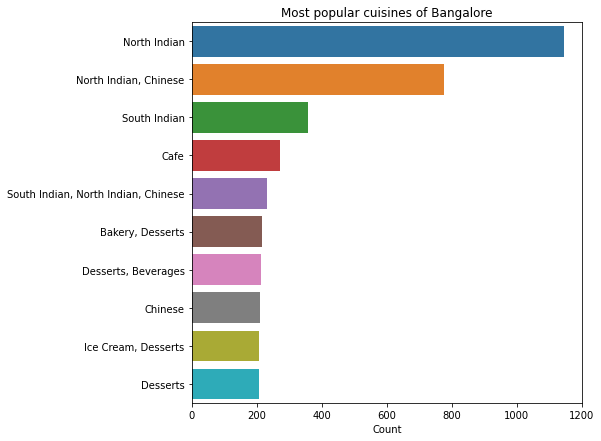

In [49]:
plt.figure(figsize=(7,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [50]:
def produce_data(col,name):
    data= pd.DataFrame(df[df[col]==name].groupby(['location'],as_index=False)['url'].agg('count'))
    data.columns=['Name','count']
    print(data.head())
    data=data.merge(locations,on="Name",how='left').dropna()
    data['lan'],data['lon']=zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'],axis=1)

In [51]:
North_India=produce_data('cuisines','North Indian')

                Name  count
0                BTM     86
1       Banashankari     10
2          Banaswadi      4
3  Bannerghatta Road     36
4       Basavanagudi     12


In [52]:
basemap=generateBaseMap()
HeatMap(North_India[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [53]:
food=produce_data('cuisines','South Indian')
basemap=generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

                Name  count
0                BTM      6
1       Banashankari     25
2          Banaswadi      9
3  Bannerghatta Road      3
4       Basavanagudi     44
